## 8/6 
1. 用  nn 生出投影片(https://docs.google.com/presentation/d/145CfeG5cIpz4rV17pA5dxclZgSli1Z9LWQqKI25H-jI/edit#slide=id.g2bc9eeedc02_0_12) 所描述的 features
2. 同時請教照霖可否按時抓pv 


## 8/5
### Use stratify to ensure the category distribution of the validation set reflects that of the training set:

#### 實驗二: 使用 stratify 進行切割資料

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

#### 查看訓練集三種類別比例

pd.Series(y_train).value_counts(normalize=True)

#### 查看測試集三種類別比例

pd.Series(y_test).value_counts(normalize=True)


### 確認一下我使用 standard scaler 的方式有無以下問題

我們使用 fit() 方法在所有資料集 X 上做轉換，並使得轉換器學習每個特徵的整個分佈的平均值和標準差。這些資料轉換後如果再將這些數據拆分為訓練集和測試集，則訓練集會受到污染。因為 StandardScaler 從實際分佈中洩露了測試
集重要訊息

**即使切開後也不要再拿測試集呼叫 fit() 或 fit_transform()，這一樣會導致相同問題發生。**因為訓練集和測試集必須進行相同的轉換，依照官方的範例我們必須先使用 fit_transform() 在訓練集上進行擬合與轉換。**（YS：我想意思是，用訓練集的 SD 和 Mean 對測試集進行轉換）這**（YS：我想意思是，用訓練集的 SD 和 Mean 對測試集進行轉換）確保了轉換器僅從訓練集學習，從中找出參數例如平均值與變異數並同時對其進行變換。**接著使用 transform() 方法在測試資料上進行轉換，根據從訓練數據中學到的訊息進行轉換。**

當你的模型**訓練集分數高於測試集的分數**，並且兩者都足夠高以滿足專案的目標期望時這代表你訓練了一個好模型。當訓練和測試分數差異很大時，問題往往與測試集有關而不是過度擬合。這時候你可能要**檢查資料預處理的方式是否一致 (像是取 log 或 scale)，或是只是忘記對測試集做轉換處理。**

statified K-Fold:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold

沒有資料視覺化的習慣：有兩篇參考文

**在預設的情況下所有 Sklearn 分類器在呼叫 score() 函數時都使用準確度作為評分方法。**由於準確率的計算方式簡單與容易理解，因此經常會看到初學者廣泛使用它來判斷其模型的性能。不幸的是**這種一般準確率的評估方式只對類別平衡的二元分類問題有用。**

### 跑了 k-fold 能幹麻
1. 因此訓練十回將會有十個不同驗證集的 Error，這個 Error 通常我們會稱作 loss 也就是模型評估方式。模型評估方式有很多種，以回歸問題來說就有 MSE、MAE、RMSE...等。最終**把這十次的 loss 加總起來取平均就可以當成最終結果。透過這種方式，不同分組訓練的結果進行平均來減少方差，因此模型的性能對數據的劃分就不會那麼敏感。**

## 7/21  PV means 是否算一下標準差? 光看平均值有無意義

## 7/20 確定一下這樣算出的是「For each training, the most relevant historical」. First of all, why am I seeing only one index for each article while I selected the top 3? 

## 7/10 下午或 7/11 Add these 4 content-based features to the feature lists and revise the model

## Also think how to make similarities more diverse
(e.g. use true embeddings? Like those trained on Chinese wiki )

## 7/10 用「有/無某一tag」這樣算出來的similarity 只會有幾個值（i.e. 同樣 similarity 的文章很多），因此決定只取「最像」的那幾篇

## 7/5 Tag reresented by embeddings and compared using KNN(?) rather than one-by-one for-loops


## 7/1 筆電版用 CUDA 跑

## 6/28 注意：我有時是針對 50，有時是針對兩萬，且很多 "else" 都沒寫，要注意是否會造成問題

## 6/27

1. 檢驗一下 shared tags 和對應的標題是否搭配（以防shared tags 撈錯）

## 6/24 

1. Freshness: 

(i) Topic Intersection;

=>

a. （wf zl）用 title embedding，取過去半年

b. 計算兩萬中的每一篇

tags 和「半年 tags」重疊的程度

和半年的 tags 重疊的那些 tags 在半年出現次數

半年中最相似的文章 pv 如何

[('總統大選', 565),

c.embedding

現成詞向量，目的是計算相似度

import urllib.request

url = 'https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.zh.vec'

urllib.request.urlretrieve(url, './wiki.zh.vec')


(ii) Click count of 10 most similar articles;

最像的 10 篇的 pv (0/1) 有助於預測這篇的 pv (0/1)

(iii) Content similarity of 10 most similar articles; and 

(iv) Number of similar articles in the historical dataset

2. Meta

Reporter

## 6/21

1. 參考維吉尼亞的 freshness 作法，想想 tags 等要怎麼用（相關概念是「相似度」）

## 6/19 
1. Independent test set

## 6/18 

1. 雖然我猜 RF 不會比 XGB 好，但還是可以試著 prune the forest

2. 由 confusion matrix 看來，分「低組」、「高組」或許效果會還不錯？

=>或是「高/不高」

3. 但 feature importance 都這麼低，讓我有點不確定根本問題是不是出在 feature

4.  6/18 拿大一點的資料來測，可驗證假設 "2" 

5. 用了兩萬筆後，部份資料「可能」需要重算

reporter_NE Target_Encoding_reporter_NE    0.292985 1st 

ChatGPT_sensational 0.078411 4th 

ne_count 0.039516 9th

hq_count	0.020118 12th

先產生ne，其他不確定值得

## 6/17

Mine is a multinomial questions. Couple of things to note:

For multiclass classification, XGBoost provides two objective functions:


The original quality column contains values from 3 to 8, so we need to subtract the minimum value from this column to make it start from 0.

from sklearn.model_selection import train_test_split


There are many ways for measuring classification performance. Accuracy, confusion matrix, log-loss, and AUC-ROC are some of the most popular metrics. Precision-recall is a widely used metrics for classification problems.

### Separate target variable
X = data.drop('quality', axis=1)


**y = data['quality'] - data['quality'].min()**

### Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 6/15

0. 除非特別處理，不然 XGBoost 的 y 似乎必須要是數字

## 6/14

0 目前主要參考對象應該是**（用 pair plot 拿掉高度相關的 features）0605納入大多數欄位**

（即XGBoost 比較有調過的版本）

#### 1. Natural Log 還該做嗎？

想像中，如果要做，應該是：

step1:Remove outliers beyond specified 1st and 3rd quartiles

step2:Do natural log

step3: bin the natural-log-transformed y

step4: predict the categories corresponding to different levels of natural-log-transformed ys.

If I natural-log-transform y, ain't I training a model to predict "natural-log-transformed" ys, intead of actual y values? 

=>如要預測真正 y values，要把y 轉回未進行 natural log 的值 

y_pred = np.exp(log_y_pred)

但由於我的分數也是拿natural-log-transformed的 y_actual, y_pred 相比，應該沒有冤枉的問題

#### 2. Score不是一切
即使整體 score 不好，依然可以

**強調部份類別的表現：**

 6/14 very_high 的 precision 54%
 
**改善部份類別的表現**

如果發現某一類別被低估/過度認定，可調整其門檻。判斷前者可用 confusion matrix：

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true, y_pred))

門檻預設 0.5，但如果 FP/FN 過多，可調低/高


#### 4. MSE 可能不能用

目前用 classification report，但是否還需要有 loss (還是 loss 為 regression 專屬)

#### 5. 這次用了不到 4,000 筆

應該增加資料量

### 6. Optimizer 可能也不宜用「val loss 是否增加」當標準了

In [1]:
# pip install pycuda

In [2]:
import os
import json
import pandas as pd

import numpy as np

import re

In [3]:
# %run feature_processing.ipynb

In [4]:
important_20000=pd.read_csv('important_news_26424.csv',index_col=0)#有了 "index_col=0" 就不會多一排"0"

In [5]:
important_20000['tags'].head()

0                                     []
0          ['國民黨', '2024選舉', '2024立委選舉']
0                                     []
0    ['蔣萬安', '陳其邁', '壽山動物園', '倉鼠', '影片']
0                     ['役男', '憲兵', '鬥毆']
Name: tags, dtype: object

In [6]:
def remove_non_word(item):
    item=re.sub(("'"),'',item)
    item=re.sub(("\["),'',item)
    item=re.sub(("\]"),'',item)
    item=re.sub(("\"\""),'',item)
    return item

In [7]:
def get_all_df_tags(df):
    #將['tag']中的tag 逐一取出，成為一包含整個df 所有 tags 的大串列
    #注意，['tag']欄本身沒被動到，仍是 str
    all_tags=[]
    for i in range(len(df)):
        splitted=df['tags'].iloc[i].split(', ')
        for item in splitted:
            item=remove_non_word(item)
            all_tags.append(item)    
    return all_tags

In [8]:
important_news_6_months=pd.read_csv('important_news_6_months.csv')

In [9]:
important_20000_tags=list(dict.fromkeys(get_all_df_tags(important_20000)).keys())#unique tags
important_news_6_months_tags=list(dict.fromkeys(get_all_df_tags(important_news_6_months)).keys())
print(f"訓練資料（2023-09-01~2024-02-29）有{len(important_20000_tags)}個 tags")
print(f"歷史資料（2023-03-01~2023-08-31）有{len(important_news_6_months_tags)}個 tags")
print(f"訓練資料（2023-09-01~2024-02-29）前 10 個 tags:\n{important_20000_tags[:10]}")
print(f"歷史資料（2023-03-01~2023-08-31）前 10 個 tags:\n{important_news_6_months_tags[:10]}")

訓練資料（2023-09-01~2024-02-29）有2218個 tags
歷史資料（2023-03-01~2023-08-31）有2168個 tags
訓練資料（2023-09-01~2024-02-29）前 10 個 tags:
['', '國民黨', '2024選舉', '2024立委選舉', '蔣萬安', '陳其邁', '壽山動物園', '倉鼠', '影片', '役男']
歷史資料（2023-03-01~2023-08-31）前 10 個 tags:
['', '林佳龍', '林明溱', '南投', '柯文哲', '張麗善', '劉建國', '雲林', '二二八事件', '反恐']


In [10]:
## 拿掉歷史 tags 的 '' （歷史tags 會被拿來比對，怕 '' 會誤中訓練資料）

del important_news_6_months_tags[0]

In [11]:
def get_tag_from_cell(cell_string):
    #將單一文章的tag 轉成串列，和 get_tag一樣，df沒變 
    tag_list=[]
    splitted=cell_string.split(', ')
    for tag in splitted:
        tag=remove_non_word(tag)
        tag_list.append(tag)
    return tag_list

In [12]:
#將訓練資料的 ['tags'] 轉成 list
important_20000.loc[:,'tags']=\
important_20000.loc[:,'tags'].apply(get_tag_from_cell)

In [13]:
print(important_20000.iloc[1]['tags'][1])

2024選舉


In [14]:
#將歷史資料的 ['tags'] 轉成 list
important_news_6_months['tags']=\
important_news_6_months['tags'].apply(lambda x:get_tag_from_cell(x))

## 7/15 Claude's Spare-Matrix Approach

#### Issue：想要避開那些完全不包含歷史標籤的文章、不予排序，但要比對的 matrix 很大(26424, 21185)

#### 兩大原則：

1. 先不轉 dense （or 轉回 sparse?)

2. 使用篩選 matrices 的函數（類似篩選 df 的函數）

#### 總之，精神相同：不要用 for-loop

In [15]:
from scipy.sparse import csr_matrix

#### 儘管以下 create_sparse_matrix 也是兩萬多乘以avg_tag_list_len 的 for-loop、但 a) 僅檢驗有無在辭典，不在這個階段做任何兩個 matrix 的比較，因此很快跑完且 b) 由於 sparse_matrix 只記憶有值資料，之後的操作也快

In [16]:
def create_sparse_matrix(tag_lists,dictionary):#Note that the tag_lists here refer NOT to 0/1
    rows,cols,data=[],[],[]
    for i,tags in enumerate(tag_lists):
        for tag in tags:
            if tag in dictionary:
                rows.append(i)#不是直接填到 matrix，感覺是給 csr_matrix 知道哪些列有東西
                cols.append(dictionary[tag])#不是直接填到 matrix，感覺是給 csr_matrix 知道有哪些詞對中
    data=np.ones(len(rows))#這才是填到 matrix的值，填那一格則視那一格對到
    return csr_matrix((data,(rows,cols)),shape=(len(tag_lists),len(dictionary)))

In [17]:
important_20000['tags'].tolist()[:3]#第一筆是空的

[[''], ['國民黨', '2024選舉', '2024立委選舉'], ['']]

In [18]:
dictionary={value:index for index, value in enumerate(important_news_6_months_tags)}

In [19]:
sparse_training=create_sparse_matrix\
(important_20000['tags'].tolist(),dictionary)
sparse_historical=create_sparse_matrix\
(important_news_6_months['tags'].tolist(),dictionary)

#### Shape 儘管和 dense 時相同，記憶負擔比較小

In [20]:
np.savetxt('sparse_training.txt',csr_matrix(sparse_training).todense())

In [21]:
sparse_training.shape

(26424, 2167)

In [22]:
sparse_historical.shape

(21185, 2167)

#### 除 sparse_matrix，相似度計算改用 numpy 函式計算，以C++(?) 為基底，比 for-loop 快得多

In [23]:
def jaccard_similarity(matrix1, matrix2):
    # Convert to binary (presence/absence)
    #numbers largr than 1 coverted to 1
    binary1 = (matrix1 > 0).astype(int)
    binary2 = (matrix2 > 0).astype(int)
    
    # Calculate Jaccard similarity
    intersection = binary1.dot(binary2.T)
    #YSQ 我想是這裡的順序（binary1先，binary2後）決定了最後的陣列是...
    #...「每篇b1和所有b2的比較」
    #YSQ:但我自己用 matrixes 去試，得到的 matrix 包含 b1, b2 沒有的成份，...
    #...為何會說是 intersection 呢
    
    # Calculate union
    sum1 = binary1.sum(axis=1)
    sum2 = binary2.sum(axis=1)
    union = sum1.reshape(-1, 1) + sum2.reshape(1, -1) - intersection
    #Broadcasting provides a means of vectorizing array operations 
    #...so that looping occurs in C instead of Python
    
    #Convert intersection to dense matrices 
    #(a previous type error could've resulted from not having done this.)
    intersection=intersection.toarray()
    
    # Avoid division by zero
    with np.errstate(divide='ignore', invalid='ignore'):
        similarity = np.divide(intersection, union)
        similarity[union == 0] = 0  # Set similarity to 0 where union is 0
    return similarity

#### Identify training articles where none of the dictionary tags were found

In [24]:
num_of_nz_per_row=sparse_training.getnnz(axis=1)
#'Axis' applies to matrixes as well
#Note that while csr_matrix() only stores non zeros, 
#...it's still possible to get zeros from it using getnz
#Despite the name 'num_of_nz_per_row=sparse_training',...
#...what's returned includes the indexes

indices_of_rows_with_only_zeros_training=np.where(num_of_nz_per_row ==0)[0] #shape[0]是取index
indices_of_rows_with_ones_training=np.where(num_of_nz_per_row !=0)[0]
#"np.where" appears to be the matrix equivalent of df's 'apply' or 'loc'
#However, the resulting datatype is 'tuple'

print(f"indices_of_rows_with_only_zeros_training:\n{indices_of_rows_with_only_zeros_training}")
print(f"indices_of_rows_with_ones_training:\n{indices_of_rows_with_ones_training}")

indices_of_rows_with_only_zeros_training:
[    0     2     8 ... 26365 26375 26386]
indices_of_rows_with_ones_training:
[    1     3     4 ... 26421 26422 26423]


In [25]:
# #由有1的文章形成的 matrix
not_only_zero_training_matrix=\
sparse_training[indices_of_rows_with_ones_training]

In [26]:
not_only_zero_training_matrix.shape[0]

23513

#### 歷史資料每一行有幾個 1（如果有的話）

In [27]:
historical_num_of_nnz_per_row=sparse_historical.getnnz(axis=1)

indices_of_rows_with_only_zeros_historical=\
np.where(historical_num_of_nnz_per_row==0)[0]
indices_of_rows_with_ones_historical=\
np.where(historical_num_of_nnz_per_row!=0)[0]

sparse_historical[np.where(historical_num_of_nnz_per_row !=0)].shape[0]

19408

In [28]:
sparse_historical[np.where(historical_num_of_nnz_per_row != 0)].shape

(19408, 2167)

####  historical 有 tags 者共 19408 筆。試試看只用有 tags 者比對

In [29]:
not_only_zero_historical_matrix=sparse_historical[np.where(historical_num_of_nnz_per_row !=0)]

In [30]:
similarity_between_historical_and_filtered_training=\
jaccard_similarity(not_only_zero_training_matrix, not_only_zero_historical_matrix)

In [31]:
similarity_between_historical_and_filtered_training.shape

(23513, 19408)

## 以下這段 initialize a similarity matrix with zeros 的部份，因會造成比對時的錯位，後改成直接將similarity matrix用「包含 1 的  training* 包含 1 的 historical」定義

#### 以下是CG建議的「針對所選列＋欄」個別填值的 vectorized approach (後來放棄，因為一直出問題)

In [32]:
# #建立一個「相似度陣列」，預設值都填 0
# similarity_matrix=\
#np.zeros((sparse_training.shape[0],sparse_historical.shape[0]))

In [33]:
# #CG建議的「針對所選列＋欄」個別填值的 vectorized approach

# # Assuming similarity_between_historical_and_filtered_training
#...and similarity_matrix are numpy arrays
# # Create a meshgrid of indices for indices_of_rows_with_ones_training
#...and indices_of_rows_with_ones_historical
#... row_indices, col_indices = np.ix_(indices_of_rows_with_ones_training, indices_of_rows_with_ones_historical)

# # Assign values from similarity_between_historical_and_filtered_training to similarity_matrix
# similarity_matrix[row_indices, col_indices] = similarity_between_historical_and_filtered_training

## 以下改將 similarity matrix 定義為「由含1的 training 和含 1 的 historical」所組成」
#### 此 matrix 的索引值已經和原本的 sparse matrix 不同 （rows、cols 皆不同）

In [34]:
similarity_matrix=similarity_between_historical_and_filtered_training

In [35]:
similarity_matrix.shape

(23513, 19408)

In [36]:
similarity_matrix[:10,:]

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.125     ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.2       ,
         0.16666667],
        [0.        , 0.1       , 0.        , ..., 0.        , 0.07692308,
         0.23076923],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.33333333]])

#### 索引值相關計算（先找出索引，再找出對應similarity values）

只挑相似度最高的三個
要從「包含原始索引值的有1資料索引值」中，取出「針對有1資reindex」的索引值，才是原始資料的索引值

In [37]:
# Find the most similar historical indexes
filtered_most_similar_historical_indexes =\
np.argsort(similarity_matrix, axis=1)[:, -3:][:,::-1]

### 從索引值取得 similarity values: np.take_along_axis

In [38]:
# 從索引值取得 similarity values: np.take_along_axis
highest_3_similarity_values =\
np.take_along_axis(similarity_matrix, filtered_most_similar_historical_indexes, axis=1)

#### Mapping the filtered indices back to the original ones 

In [39]:
#### 先 map 訓練資料

In [40]:
#Create an empty matrix with default no-harm values, 
#...some of which to be replaced by ones
full_size_similarity_values =\
np.full((sparse_training.shape[0], 3), -1, dtype=float)

In [41]:
full_size_similarity_values[indices_of_rows_with_ones_training]=\
highest_3_similarity_values

In [42]:
full_size_similarity_values.shape[0]

26424

In [43]:
#### 再 map 歷史

In [44]:
# Map the filtered indices back to the original indices
most_similar_historical_indexes =\
indices_of_rows_with_ones_historical[filtered_most_similar_historical_indexes]

In [45]:
# Create a full-size result matrix initialized with -1
# (or any value that's not a valid index)
full_size_index_result = np.full((sparse_training.shape[0], 3), -1, dtype=int)

#將索引依相似度排序，由高至低
most_similar_historical_indexes=most_similar_historical_indexes[:,::-1]

# Fill in the results for non-zero training rows
full_size_index_result[indices_of_rows_with_ones_training] =\
most_similar_historical_indexes

print(full_size_index_result[:7])

[[   -1    -1    -1]
 [20176 18536 17913]
 [   -1    -1    -1]
 [ 4230 18487 18463]
 [ 1287  2358 18650]
 [20409 16144  1413]
 [10941  4807  7972]]


In [46]:
most_similar_historical_indexes[:5]

array([[20176, 18536, 17913],
       [ 4230, 18487, 18463],
       [ 1287,  2358, 18650],
       [20409, 16144,  1413],
       [10941,  4807,  7972]], dtype=int64)

In [47]:
important_20000.shape[0]

26424

In [48]:
#最高三個相似值填入 df
important_20000.loc[:,'highest_3_similarity']=\
full_size_similarity_values.tolist()

In [49]:
important_20000['highest_3_similarity']=\
important_20000['highest_3_similarity'].apply(lambda x:np.round(x,2))

#最高三個相似值平均填入 df

important_20000.loc[:,'mean_similarity']=\
important_20000['highest_3_similarity'].apply(lambda x:np.round(np.mean(x),2))
#'Apply' applies to elements of an iterable

#最高三個相似值總和填入 df

important_20000.loc[:,'similarity_sum']=\
important_20000['highest_3_similarity'].apply(lambda x:round(np.sum(x),2))

#### 找出 pv

In [50]:
#Find out unique members of a matrix
#GFG(Geek for Geeks)

# using numpy.unique() for checking unique values in matrix
unique_historical_indexes_similar_to_some_training =\
np.unique(most_similar_historical_indexes).\
tolist()

historical_pvs=important_news_6_months['pageview'].\
iloc[unique_historical_indexes_similar_to_some_training]

In [51]:
#zip 的兩個 list 可直接轉 key:value，無須先轉list
pv_dict={key:pv \
          for key,pv in \
         zip(unique_historical_indexes_similar_to_some_training,historical_pvs)}

#### 以下的 map() 用法有點複雜，有留html檔參考

In [52]:
pv_matrix=np.array\
(list(map(lambda x:list(map(pv_dict.get,x)), \
          most_similar_historical_indexes)))
#"dictionary.get(key) 
#The inner map returns a list of values, while the outer 

#### 把 pv_matrix 重新填入具有原 shape (26462) 的架構

In [53]:
full_size_pv_matrix=\
np.full((sparse_training.shape[0],3),-1,dtype=float)
# full_size_similarity_values =\
# np.full((sparse_training.shape[0], 3), -1, dtype=float)

In [54]:
full_size_pv_matrix[indices_of_rows_with_ones_training]=pv_matrix

In [55]:
full_size_pv_matrix[:10]

array([[-1.0000e+00, -1.0000e+00, -1.0000e+00],
       [ 1.6030e+03,  2.0190e+03,  5.8000e+01],
       [-1.0000e+00, -1.0000e+00, -1.0000e+00],
       [ 5.6100e+02,  2.6220e+03,  2.9860e+03],
       [ 9.1790e+03,  2.2100e+02,  1.0900e+02],
       [ 3.6300e+02,  6.3400e+02,  1.0800e+02],
       [ 1.3383e+04,  2.7600e+02,  4.4830e+03],
       [ 2.1000e+02,  1.6100e+04,  4.6206e+04],
       [-1.0000e+00, -1.0000e+00, -1.0000e+00],
       [ 6.2200e+03,  1.7675e+04,  3.1000e+03]])

In [56]:
important_20000.loc[:,'pv_of_similar_historical']=full_size_pv_matrix.tolist()

In [57]:
#indices_of_rows_with_only_zeros_training
#把 "[1891, 1891, 1891]" 取代為 NA
important_20000['pv_of_similar_historical'].iloc[indices_of_rows_with_only_zeros_training]='NA'

C:\Users\USER\AppData\Local\Temp\ipykernel_2316\1319743018.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important_20000['pv_of_similar_historical'].iloc[indices_of_rows_with_only_zeros_training]='NA'


In [58]:
important_20000['pv_of_similar_historical'].iloc[:10]

0                           NA
0       [1603.0, 2019.0, 58.0]
0                           NA
0      [561.0, 2622.0, 2986.0]
0       [9179.0, 221.0, 109.0]
0        [363.0, 634.0, 108.0]
0     [13383.0, 276.0, 4483.0]
0    [210.0, 16100.0, 46206.0]
0                           NA
0    [6220.0, 17675.0, 3100.0]
Name: pv_of_similar_historical, dtype: object

In [59]:
#Sublists to arrays
#pv_sublists_as_arrays

important_20000.loc[:,'mean_pv']=\
[int(np.mean(np.array(sublist)))\
 if 'NA' not in sublist else 'NA'\
 for sublist in important_20000['pv_of_similar_historical']]

In [60]:
important_20000['mean_pv'].iloc[:10]

0       NA
0     1226
0       NA
0     2056
0     3169
0      368
0     6047
0    20838
0       NA
0     8998
Name: mean_pv, dtype: object

In [61]:
important_20000.loc[:,'pv_sum']=\
[np.sum(sublist) if 'NA' not in sublist else 'NA' for sublist in important_20000['pv_of_similar_historical']]

In [62]:
important_20000.columns

Index(['channelId', 'articleId', 'articleType', 'reporter', 'authorId',
       'headline', 'subHeadline', 'summary', 'sourceName', 'paperId',
       'presentDate', 'insertTime', 'modifiedTime', 'providerId',
       'instantNews', 'rid', 'porn', 'categoryId', 'upperCategoryId', 'status',
       'weight', 'onlineTime', 'offlineTime', 'firstPublishTime',
       'displayTime', 'publishTime', 'topPush', 'choice', 'pageview', 'body',
       'articleURL', 'articleTypeName', 'categoryName', 'upperCategoryName',
       'documentType', 'videoNumber', 'pictureNumber', 'tags',
       'highest_3_similarity', 'mean_similarity', 'similarity_sum',
       'pv_of_similar_historical', 'mean_pv', 'pv_sum'],
      dtype='object')

In [63]:
#把 historical indexes 也變成 df 的新欄位
full_size_index_result=full_size_index_result.tolist()
important_20000.loc[:,'indexes_of_similar_historical']=full_size_index_result

In [64]:
important_20000['indexes_of_similar_historical'].iloc[:10]

0             [-1, -1, -1]
0    [20176, 18536, 17913]
0             [-1, -1, -1]
0     [4230, 18487, 18463]
0      [1287, 2358, 18650]
0     [20409, 16144, 1413]
0      [10941, 4807, 7972]
0       [3520, 3094, 2107]
0             [-1, -1, -1]
0    [20970, 20971, 21008]
Name: indexes_of_similar_historical, dtype: object

In [65]:
indexes_of_similar_historical_with_negative_ones=\
important_20000['indexes_of_similar_historical'].tolist()

In [66]:
#把沒對中historical 的 indexes 取代為 'NA'
important_20000['indexes_of_similar_historical'].iloc[indices_of_rows_with_only_zeros_training]='NA'

C:\Users\USER\AppData\Local\Temp\ipykernel_2316\171103860.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important_20000['indexes_of_similar_historical'].iloc[indices_of_rows_with_only_zeros_training]='NA'


In [67]:
important_20000['indexes_of_similar_historical'].iloc[:10]

0                       NA
0    [20176, 18536, 17913]
0                       NA
0     [4230, 18487, 18463]
0      [1287, 2358, 18650]
0     [20409, 16144, 1413]
0      [10941, 4807, 7972]
0       [3520, 3094, 2107]
0                       NA
0    [20970, 20971, 21008]
Name: indexes_of_similar_historical, dtype: object

In [68]:
important_20000[['pv_of_similar_historical', 'mean_pv', 'pv_sum',
      'highest_3_similarity',
       'mean_similarity', 'similarity_sum']].iloc[:10]

,pv_of_similar_historical,mean_pv,pv_sum,highest_3_similarity,mean_similarity,similarity_sum
0,NA,NA,NA,"[-1.0, -1.0, -1.0]",-1.00,-3.00
0,"[1603.0, 2019.0, 58.0]",1226,3680.0,"[1.0, 0.75, 0.75]",0.83,2.50
0,NA,NA,NA,"[-1.0, -1.0, -1.0]",-1.00,-3.00
0,"[561.0, 2622.0, 2986.0]",2056,6169.0,"[0.67, 0.5, 0.33]",0.50,1.50
0,"[9179.0, 221.0, 109.0]",3169,9509.0,"[0.33, 0.33, 0.25]",0.30,0.91
0,"[363.0, 634.0, 108.0]",368,1105.0,"[0.4, 0.4, 0.33]",0.38,1.13
0,"[13383.0, 276.0, 4483.0]",6047,18142.0,"[0.33, 0.33, 0.33]",0.33,0.99
0,"[210.0, 16100.0, 46206.0]",20838,62516.0,"[0.5, 0.4, 0.25]",0.38,1.15
0,NA,NA,NA,"[-1.0, -1.0, -1.0]",-1.00,-3.00
0,"[6220.0, 17675.0, 3100.0]",8998,26995.0,"[0.75, 0.62, 0.56]",0.64,1.93


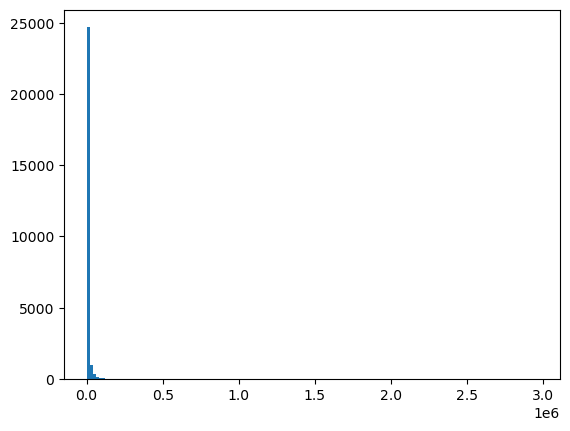

In [69]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.hist(important_20000['pageview'],bins=150)
plt.show()

## UDN 新聞資料庫原始 json 合併而成的檔案，印出為 csv 檔

In [70]:
important_20000.to_csv('original_json_converted_20000.csv')

In [71]:
#新增 pv和驚嘆號有無關係

important_20000.loc[:,'has_exclaimation']=important_20000['headline']\
.str.contains('！')

important_20000.loc[:,'has_exclaimation']=\
important_20000['has_exclaimation'].apply(lambda x:1 if x==True else 0)

In [72]:
%run feature_processing.ipynb

In [73]:
#pv和長度有無關係

#新增 headline_len
important_20000.loc[:,'headline_len']=important_20000['headline'].apply\
(lambda x:len_without_space(x))

In [74]:
important_20000.columns

Index(['channelId', 'articleId', 'articleType', 'reporter', 'authorId',
       'headline', 'subHeadline', 'summary', 'sourceName', 'paperId',
       'presentDate', 'insertTime', 'modifiedTime', 'providerId',
       'instantNews', 'rid', 'porn', 'categoryId', 'upperCategoryId', 'status',
       'weight', 'onlineTime', 'offlineTime', 'firstPublishTime',
       'displayTime', 'publishTime', 'topPush', 'choice', 'pageview', 'body',
       'articleURL', 'articleTypeName', 'categoryName', 'upperCategoryName',
       'documentType', 'videoNumber', 'pictureNumber', 'tags',
       'highest_3_similarity', 'mean_similarity', 'similarity_sum',
       'pv_of_similar_historical', 'mean_pv', 'pv_sum',
       'indexes_of_similar_historical', 'has_exclaimation', 'headline_len'],
      dtype='object')

In [75]:
important_20000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26424 entries, 0 to 0
Data columns (total 47 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   channelId                      26424 non-null  int64  
 1   articleId                      26424 non-null  int64  
 2   articleType                    26424 non-null  int64  
 3   reporter                       26424 non-null  object 
 4   authorId                       26424 non-null  int64  
 5   headline                       26424 non-null  object 
 6   subHeadline                    3753 non-null   object 
 7   summary                        26152 non-null  object 
 8   sourceName                     26424 non-null  object 
 9   paperId                        26424 non-null  int64  
 10  presentDate                    26424 non-null  object 
 11  insertTime                     26424 non-null  object 
 12  modifiedTime                   26392 non-null  obj

**subHeadline        4938  應刪除**

**modifiedTime       5221  應刪除** 

**topPush            5060  應補 "Y"**

**choice             5056  應補 "Y"**

## 6/18 reporter'' 請庭豪跑NE

In [76]:
reporter_ne_df=pd.read_excel('(兩萬筆) reporter_to_label_NE.ods',engine='odf')
reporter_ne_df=reporter_ne_df.fillna('no ne')
print(reporter_ne_df.head())

             reporter                     reporter_NE
0                綜合整理                           no ne
1                綜合報導                           no ne
2              聯合報數位版                           no ne
3          記者洪子凱／台北報導                      PERSON_洪子凱
4  記者洪哲政、呂慧瑜、李宗祐／連線報導  PERSON_洪哲政PERSON_呂慧瑜PERSON_李宗祐


## 6/24 起，新增記者名

In [77]:
reporter_ne_df.loc[:,'reporter_ne_count']=\
reporter_ne_df['reporter_NE'].apply(lambda x:len(re.findall('_',x)))

In [78]:
reporter_ne_df['reporter_ne_count'].head()

0    0
1    0
2    0
3    1
4    3
Name: reporter_ne_count, dtype: int64

In [79]:
reporter_ne_df['reporter_NE'].head()

0                             no ne
1                             no ne
2                             no ne
3                        PERSON_洪子凱
4    PERSON_洪哲政PERSON_呂慧瑜PERSON_李宗祐
Name: reporter_NE, dtype: object

In [80]:
reporter_ne_df.to_csv('reporter_ne_20000.csv')

In [81]:
# 先把沒有 topPush choice  的空白補上 "Y"

important_20000['topPush']=important_20000['topPush'].fillna("Y")
important_20000['choice']=important_20000['choice'].fillna("Y")

In [82]:
important_20000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26424 entries, 0 to 0
Data columns (total 47 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   channelId                      26424 non-null  int64  
 1   articleId                      26424 non-null  int64  
 2   articleType                    26424 non-null  int64  
 3   reporter                       26424 non-null  object 
 4   authorId                       26424 non-null  int64  
 5   headline                       26424 non-null  object 
 6   subHeadline                    3753 non-null   object 
 7   summary                        26152 non-null  object 
 8   sourceName                     26424 non-null  object 
 9   paperId                        26424 non-null  int64  
 10  presentDate                    26424 non-null  object 
 11  insertTime                     26424 non-null  object 
 12  modifiedTime                   26392 non-null  obj

## 在還沒刪掉任何一列的情況下，合併兩個檔案

In [83]:
important_20000=important_20000.reset_index()
reporter_ne_df=reporter_ne_df.reset_index()
important_20000=pd.concat([important_20000,reporter_ne_df],axis=1,ignore_index=False)

In [84]:
important_20000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26424 entries, 0 to 26423
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   index                          26424 non-null  int64  
 1   channelId                      26424 non-null  int64  
 2   articleId                      26424 non-null  int64  
 3   articleType                    26424 non-null  int64  
 4   reporter                       26424 non-null  object 
 5   authorId                       26424 non-null  int64  
 6   headline                       26424 non-null  object 
 7   subHeadline                    3753 non-null   object 
 8   summary                        26152 non-null  object 
 9   sourceName                     26424 non-null  object 
 10  paperId                        26424 non-null  int64  
 11  presentDate                    26424 non-null  object 
 12  insertTime                     26424 non-null 

 ## 評估有 NaN 的欄位是否值得為他拿掉一整列
 
 6   subHeadline          575 non-null    object  不值得
 
 7   summary              5168 non-null   object  不值得
 
 12  modifiedTime         5221 non-null   object  不值得
 
 15  rid                  4775 non-null   object  不值得
 
 39  reporter_NE          3995 non-null   object  值得

### 7/31 真要拿掉 reporter_ne? 先看看它長怎樣吧

In [85]:
important_20000['reporter_NE'].iloc[:10]

0                                      no ne
1                                      no ne
2                                      no ne
3                                 PERSON_洪子凱
4             PERSON_洪哲政PERSON_呂慧瑜PERSON_李宗祐
5             PERSON_鄭媁PERSON_歐陽良盈PERSON_王燕華
6             PERSON_曾健祐PERSON_蔣永佑PERSON_林孟潔
7                                 PERSON_周辰陽
8             PERSON_彭宣雅PERSON_王勇超PERSON_任義宇
9    PERSON_鄭媁PERSON_許政榆PERSON_林琮恩PERSON_葉冠妤
Name: reporter_NE, dtype: object

In [86]:
important_20000['reporter_ne_count'].iloc[:10]

0    0
1    0
2    0
3    1
4    3
5    3
6    3
7    1
8    3
9    4
Name: reporter_ne_count, dtype: int64

### 7/31 雖然有考慮過拿掉 reporter_ne，但最後沒拿，只是沒納入 features

In [87]:
important_20000=\
important_20000.drop(columns=['subHeadline','summary','modifiedTime','rid'])

#df = df.drop(columns=['gender'])

In [88]:
important_20000=important_20000.dropna()
important_20000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26424 entries, 0 to 26423
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   index                          26424 non-null  int64  
 1   channelId                      26424 non-null  int64  
 2   articleId                      26424 non-null  int64  
 3   articleType                    26424 non-null  int64  
 4   reporter                       26424 non-null  object 
 5   authorId                       26424 non-null  int64  
 6   headline                       26424 non-null  object 
 7   sourceName                     26424 non-null  object 
 8   paperId                        26424 non-null  int64  
 9   presentDate                    26424 non-null  object 
 10  insertTime                     26424 non-null  object 
 11  providerId                     26424 non-null  int64  
 12  instantNews                    26424 non-null 

## 列數部份現在就差 y 值還未去除 outlier 了

In [89]:
from datetime import datetime
from datetime import timedelta
from pandas import Timestamp

#6/13 先貼個 display 的樣本：2024/2/14 1:24 AM
type(important_20000['displayTime'].iloc[2])

important_20000.loc[:,'displayTime']=\
important_20000['displayTime'].apply(add_zero)

print(important_20000['displayTime'].iloc[2])

2023/09/06 11:30:00


In [90]:
#新欄位：日期
important_20000.loc[:,'date']=important_20000['displayTime']\
.apply(lambda x:x[:10])

#新欄位：時間
important_20000.loc[:,'time']=important_20000['displayTime']\
.apply(lambda x:x[10:])

#新欄位：日期＋T+時間（i.e. datetime 可吃格式）

important_20000.loc[:,'converted_display_time']=important_20000['date'].apply\
(lambda x:x+'T')

important_20000['converted_display_time']=\
important_20000['converted_display_time']+\
important_20000['time']

important_20000['converted_display_time']=\
important_20000['converted_display_time'].\
apply(remove_space)


#6/13 加上秒數，以符合 ISO 格式
# important_20000['converted_display_time']=\
# important_20000['converted_display_time'].apply(lambda x:x+':00')

#轉成iso format
# important_20000['converted_display_time']=\
# important_20000['converted_display_time'].apply(lambda x:isoformat())

print(important_20000['converted_display_time'].iloc[1])
print(type(important_20000['converted_display_time'].iloc[1]))

#轉成 datetime 格式#6/13 目的是可取出其中的 accessor 'date' 和 'time'
important_20000['converted_display_time']=\
important_20000['converted_display_time'].apply\
(lambda x:datetime.strptime(x,'%Y/%m/%dT%H:%M:%S'))

# time欄位轉為 datetime.time

important_20000['time']=important_20000['time'].apply(remove_space)

important_20000['time']=\
pd.to_datetime(important_20000['time']).dt.time 
#dt as "accessor", e.g. "str" in Series.str.contains()

#4/30 datetime.time 再轉成 datetime.delta (Assuming 'time' column is in datetime.time format)
#因為 bins 和 time(被切分者)的資料類型必須相同 (以下也會把 bins 轉成 timedelta)

important_20000['time_delta']=important_20000['time'].apply\
(lambda x:timedelta(hours=x.hour,minutes=x.minute,seconds=x.second))

    
#分幾個時段
"""time_strings=['00:00:00','04:00:00','08:00:00',\
                     '12:00:00','16:00:00','20:00:00','23:59:59']
"""

time_strings=['00:00:00','02:00:00','04:00:00','06:00:00','08:00:00',\
                     '10:00:00','12:00:00','14:00:00','16:00:00','18:00:00',\
              '20:00:00','22:00:00','23:59:59']

#To avoid incorporating date into bins while feeding pd.cut() with date-included times
bins=[timedelta(hours=int(t.split(':')[0]),\
                minutes=int(t.split(':')[1]),\
                seconds=int(t.split(':')[2])) \
      for t in time_strings]

print(f"bins:{bins}")

labels=[1,2,3,4,5,6,7,8,9,10,11,12]

#4/30 CG's revision: feed datetimes with dates to pd.cut()
important_20000['timespans'] = pd.cut(important_20000['time_delta'],
                                         bins=bins,
                                         labels=labels,
                                         right=False,
                                         include_lowest=True)


# # print(f"important_20000['converted_display_time'] 長這樣:\n\
# # {important_20000['converted_display_time'].head()}")
# # print(f"important_20000['converted_display_time'] 的 type:\n\
# # {type(important_20000['converted_display_time'].iloc[0])}")

# # print(f" bins 長這樣:\n\
# # {bins}")# YSQ: Looks weird
# # print(f" bins的 type:\n\
# # {type(bins[0])}")

#新欄位：星期幾
important_20000.loc[:,'Day_of_Week']=\
important_20000['converted_display_time'].apply(lambda x: x.date().isoweekday())

2023/11/05T13:00:00
<class 'str'>
bins:[datetime.timedelta(0), datetime.timedelta(seconds=7200), datetime.timedelta(seconds=14400), datetime.timedelta(seconds=21600), datetime.timedelta(seconds=28800), datetime.timedelta(seconds=36000), datetime.timedelta(seconds=43200), datetime.timedelta(seconds=50400), datetime.timedelta(seconds=57600), datetime.timedelta(seconds=64800), datetime.timedelta(seconds=72000), datetime.timedelta(seconds=79200), datetime.timedelta(seconds=86399)]


In [91]:
important_20000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26424 entries, 0 to 26423
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   index                          26424 non-null  int64          
 1   channelId                      26424 non-null  int64          
 2   articleId                      26424 non-null  int64          
 3   articleType                    26424 non-null  int64          
 4   reporter                       26424 non-null  object         
 5   authorId                       26424 non-null  int64          
 6   headline                       26424 non-null  object         
 7   sourceName                     26424 non-null  object         
 8   paperId                        26424 non-null  int64          
 9   presentDate                    26424 non-null  object         
 10  insertTime                     26424 non-null  object         
 11  pr

#### 拿掉 y 的 outlier 前，先確認 pageview 的分佈

In [92]:
important_20000['pageview'].describe()

count    2.642400e+04
mean     6.010214e+03
std      2.574618e+04
min      0.000000e+00
25%      4.290000e+02
50%      1.262000e+03
75%      4.497250e+03
max      2.963936e+06
Name: pageview, dtype: float64

In [93]:
determine_outlier_thresholds_iqr(important_20000['pageview'])

(91.0, 25119.149999999943)

In [94]:
important_20000.loc[:,'pageview_trimmed']=\
important_20000['pageview'].apply\
(lambda x:x>=91 and x<=25119)

In [95]:
important_20000['pageview_trimmed'].value_counts()

True     23786
False     2638
Name: pageview_trimmed, dtype: int64

### 關於y 的 outlier以上是兩頭剪掉

In [96]:
important_20000=\
important_20000.loc[(important_20000.pageview_trimmed)]

In [97]:
len(important_20000)

23786

In [98]:
important_20000['pageview'].describe()

count    23786.000000
mean      3256.010763
std       4615.788268
min         91.000000
25%        476.000000
50%       1262.000000
75%       3909.000000
max      25086.000000
Name: pageview, dtype: float64

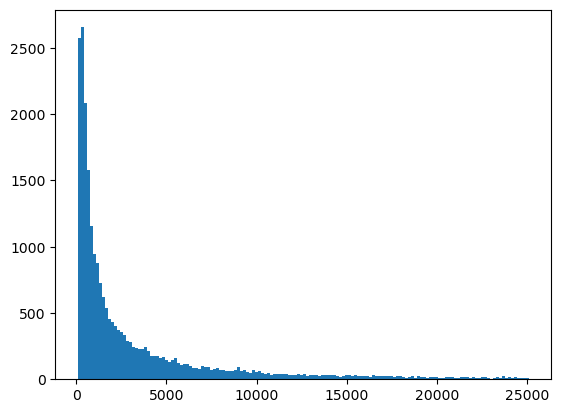

In [99]:
plt.hist(important_20000['pageview'],bins=150)
plt.show()

## （old）之前想將pageview分成數個級別，但後來決定只用 binary

In [100]:
quartile1 ,quartile2, quartile3=classifify_pv(important_20000['pageview'])

In [101]:
print(f"quartile1:{quartile1}\nquartile2:{quartile2}\nquartile3:{quartile3}")

quartile1:476.0
quartile2:1262.0
quartile3:3909.0


### 改採 binary classification

In [102]:
## （old）Median 為 1501 的版本

# bins=[0,1501,3000000]
# # labels=['low','average','high','very_high']
# labels=[0,1]

# important_20000['pageview_level']=\
# pd.cut(important_20000['pageview'],bins=bins,labels=labels,right=False,include_lowest=True)

In [103]:
# Median 為 1262 的版本

bins=[0,1262,3000000]
labels=[0,1]

important_20000['pageview_level']=\
pd.cut(important_20000['pageview'],bins=bins,labels=labels,right=False,include_lowest=True)

In [104]:
important_20000[['pageview','pageview_level']].head(20)

,pageview,pageview_level
3,1051,0
4,517,0
5,3122,1
6,731,0
7,410,0
8,7276,1
9,2267,1
10,1691,1
11,648,0
12,478,0


### 欄位齊備、outliers 已拿掉，可以做 Target Encoding 了

In [105]:
# 新增欄位：Target_Encoding_Day_of_Week

important_20000_with_TE=important_20000[['Day_of_Week','pageview']].\
groupby('Day_of_Week').pageview.mean()

important_20000_with_TE=important_20000_with_TE.to_dict()

important_20000_with_TE

important_20000.loc[:,'Target_Encoding_Day_of_Week']=\
important_20000['Day_of_Week'].map(important_20000_with_TE)

In [106]:
# 新增欄位：Target_Encoding_Day_of_Week

important_20000_with_TE=important_20000[['Day_of_Week','pageview']].\
groupby('Day_of_Week').pageview.mean()

important_20000_with_TE=important_20000_with_TE.to_dict()

important_20000_with_TE

important_20000.loc[:,'Target_Encoding_Day_of_Week']=\
important_20000['Day_of_Week'].map(important_20000_with_TE)

In [107]:
# 新增欄位：Target_Encoding_Timespan

important_20000_with_timespans_TE=important_20000[['timespans','pageview']].\
groupby('timespans').pageview.mean()

important_20000_with_timespans_TE.to_dict()

important_20000.loc[:,'Target_Encoding_Timespan']=\
important_20000['timespans'].map(important_20000_with_timespans_TE)

In [108]:
important_20000['Target_Encoding_Timespan']=\
important_20000['Target_Encoding_Timespan'].astype(float)

### 針對類別變數做 target encoding

In [109]:
#Target_Encoding_articleType

important_20000_with_TE=important_20000[['articleType','pageview']]\
.groupby('articleType').pageview.mean()

important_20000_with_TE=important_20000_with_TE.to_dict()

important_20000.loc[:,'Target_Encoding_articleType']=\
important_20000['articleType'].map(important_20000_with_TE)  


#實際驗算發現，如預期，Target Encoding 轉後後的值的確是「原值對應的所有 pageviews 的平均值」 （例外：以下的 "1" 對應5404，但驗算後應為 5,577，其他 2、4、5、98驗算過無誤）
                                       
print(f"articleType_and_pv:\n{important_20000_with_TE}")

articleType_and_pv:
{1: 3127.8044993662866, 2: 3214.8492359198663, 3: 684.2, 4: 3902.3464266230226, 5: 3237.7509157509157}


### 證明 target encoding 沒算錯，繼續將其他 categorical features 轉  target encoding 

In [110]:
important_20000['reporter_NE'].head()

3                        PERSON_洪子凱
4    PERSON_洪哲政PERSON_呂慧瑜PERSON_李宗祐
5    PERSON_鄭媁PERSON_歐陽良盈PERSON_王燕華
6    PERSON_曾健祐PERSON_蔣永佑PERSON_林孟潔
7                        PERSON_周辰陽
Name: reporter_NE, dtype: object

In [111]:
#6/24 新增 Target_Encoding_reporter_NE

important_20000_with_TE=important_20000[['reporter_NE','pageview']]\
.groupby('reporter_NE').pageview.mean()

important_20000_with_TE=important_20000_with_TE.to_dict()

important_20000.loc[:,'Target_Encoding_reporter_NE']=\
important_20000['reporter_NE'].map(important_20000_with_TE)


#Target_Encoding_paperId

important_20000_with_TE=important_20000[['paperId','pageview']]\
.groupby('paperId').pageview.mean()

important_20000_with_TE=important_20000_with_TE.to_dict()

important_20000.loc[:,'Target_Encoding_paperId']=\
important_20000['paperId'].map(important_20000_with_TE)

#Target_Encoding_providerId

important_20000_with_TE=important_20000[['providerId','pageview']]\
.groupby('providerId').pageview.mean()

important_20000_with_TE=important_20000_with_TE.to_dict()

important_20000.loc[:,'Target_Encoding_providerId']=\
important_20000['providerId'].map(important_20000_with_TE)

#Target_Encoding_instantNews

important_20000_with_TE=important_20000[['instantNews','pageview']]\
.groupby('instantNews').pageview.mean()

important_20000_with_TE=important_20000_with_TE.to_dict()

important_20000.loc[:,'Target_Encoding_instantNews']=\
important_20000['instantNews'].map(important_20000_with_TE)

#Target_Encoding_categoryId

important_20000_with_TE=important_20000[['categoryId','pageview']]\
.groupby('categoryId').pageview.mean()

important_20000.loc[:,'Target_Encoding_categoryId']=\
important_20000['categoryId'].map(important_20000_with_TE)

#Target_Encoding_upperCategoryId

important_20000_with_TE=important_20000[['upperCategoryId','pageview']]\
.groupby('upperCategoryId').pageview.mean()

important_20000_with_TE=important_20000_with_TE.to_dict()


important_20000.loc[:,'Target_Encoding_upperCategoryId']=\
important_20000['upperCategoryId'].map(important_20000_with_TE)

#Target_Encoding_status

important_20000_with_TE=important_20000[['status','pageview']]\
.groupby('status').pageview.mean()

important_20000_with_TE=important_20000_with_TE.to_dict()

important_20000.loc[:,'Target_Encoding_status']=\
important_20000['status'].map(important_20000_with_TE)

#Target_Encoding_topPush

important_20000_with_TE=important_20000[['topPush','pageview']]\
.groupby('topPush').pageview.mean()

important_20000.loc[:,'Target_Encoding_topPush']=\
important_20000['topPush'].map(important_20000_with_TE)

#Target_Encoding_documentType

important_20000_with_TE=important_20000[['documentType','pageview']]\
.groupby('documentType').pageview.mean()

important_20000_with_TE=important_20000_with_TE.to_dict()

important_20000.loc[:,'Target_Encoding_documentType']=\
important_20000['documentType'].map(important_20000_with_TE)

#Target_Encoding_choice

important_20000_with_TE=important_20000[['choice','pageview']]\
.groupby('choice').pageview.mean()

important_20000_with_TE=important_20000_with_TE.to_dict()

important_20000.loc[:,'Target_Encoding_choice']=\
important_20000['choice'].map(important_20000_with_TE)

#'Reporter awaits data cleaning'

In [112]:
# 檢查這些Target_Encoding_xxx 有沒有進到 df

important_20000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23786 entries, 3 to 26422
Data columns (total 69 columns):
 #   Column                           Non-Null Count  Dtype          
---  ------                           --------------  -----          
 0   index                            23786 non-null  int64          
 1   channelId                        23786 non-null  int64          
 2   articleId                        23786 non-null  int64          
 3   articleType                      23786 non-null  int64          
 4   reporter                         23786 non-null  object         
 5   authorId                         23786 non-null  int64          
 6   headline                         23786 non-null  object         
 7   sourceName                       23786 non-null  object         
 8   paperId                          23786 non-null  int64          
 9   presentDate                      23786 non-null  object         
 10  insertTime                       23786 non-nul

In [113]:
#reporter_NE_count 做 Target Encoding

important_20000_TE=\
important_20000[['reporter_ne_count','pageview']]\
.groupby('reporter_ne_count').pageview.mean()

important_20000_TE=\
important_20000_TE.to_dict()

important_20000.loc[:,'Target_Encoding_reporter_ne_count']=\
important_20000['reporter_ne_count'].map(important_20000_TE)

In [114]:
important_20000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23786 entries, 3 to 26422
Data columns (total 70 columns):
 #   Column                             Non-Null Count  Dtype          
---  ------                             --------------  -----          
 0   index                              23786 non-null  int64          
 1   channelId                          23786 non-null  int64          
 2   articleId                          23786 non-null  int64          
 3   articleType                        23786 non-null  int64          
 4   reporter                           23786 non-null  object         
 5   authorId                           23786 non-null  int64          
 6   headline                           23786 non-null  object         
 7   sourceName                         23786 non-null  object         
 8   paperId                            23786 non-null  int64          
 9   presentDate                        23786 non-null  object         
 10  insertTime            

## 6/14 起，y 改為 "pageview_level" 而非原來的 "pageview"

### 挑選訓練欄位

In [115]:
#挑選訓練欄位，拿掉「reporter_NE」（只保留 Target_Encoding_reporter_NE）
important_20000=\
important_20000[['headline', 'pageview_level', 'weight', 'videoNumber', 'pictureNumber',
       'headline_len', 'has_exclaimation', 'timespans', 'Day_of_Week',
       'Target_Encoding_Day_of_Week', 'Target_Encoding_Timespan',
       'Target_Encoding_articleType', 'Target_Encoding_paperId',
       'Target_Encoding_providerId', 'Target_Encoding_instantNews',
       'Target_Encoding_categoryId', 'Target_Encoding_upperCategoryId',
       'Target_Encoding_topPush',
       'Target_Encoding_documentType', 'Target_Encoding_choice',
       'Target_Encoding_reporter_ne_count','Target_Encoding_reporter_NE','mean_similarity','similarity_sum','mean_pv','pv_sum','reporter_ne_count']]

In [116]:
#!pip install odfpy

In [117]:
important_20000['timespans']=\
important_20000['timespans'].astype('int64')
important_20000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23786 entries, 3 to 26422
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   headline                           23786 non-null  object  
 1   pageview_level                     23786 non-null  category
 2   weight                             23786 non-null  int64   
 3   videoNumber                        23786 non-null  int64   
 4   pictureNumber                      23786 non-null  int64   
 5   headline_len                       23786 non-null  int64   
 6   has_exclaimation                   23786 non-null  int64   
 7   timespans                          23786 non-null  int64   
 8   Day_of_Week                        23786 non-null  int64   
 9   Target_Encoding_Day_of_Week        23786 non-null  float64 
 10  Target_Encoding_Timespan           23786 non-null  float64 
 11  Target_Encoding_articleType        23786 

In [118]:
#Create a df without 'headlines'

important_20000_features_targets_only=important_20000.iloc[:,1:]
important_20000_features_targets_only.columns

Index(['pageview_level', 'weight', 'videoNumber', 'pictureNumber',
       'headline_len', 'has_exclaimation', 'timespans', 'Day_of_Week',
       'Target_Encoding_Day_of_Week', 'Target_Encoding_Timespan',
       'Target_Encoding_articleType', 'Target_Encoding_paperId',
       'Target_Encoding_providerId', 'Target_Encoding_instantNews',
       'Target_Encoding_categoryId', 'Target_Encoding_upperCategoryId',
       'Target_Encoding_topPush', 'Target_Encoding_documentType',
       'Target_Encoding_choice', 'Target_Encoding_reporter_ne_count',
       'Target_Encoding_reporter_NE', 'mean_similarity', 'similarity_sum',
       'mean_pv', 'pv_sum', 'reporter_ne_count'],
      dtype='object')

### 處理 tags 相關幾個新生成欄位的 'NA'

In [119]:
"""'mean_similarity', 'similarity_sum',
       'mean_pv', 'pv_sum', 'reporter_ne_count'"""

important_20000_features_targets_only['mean_similarity'].value_counts().iloc[:10]

 1.00    4962
-1.00    2670
 0.50    2199
 0.67    1574
 0.75    1383
 0.83     710
 0.80     708
 0.60     699
 0.65     582
 0.56     469
Name: mean_similarity, dtype: int64

In [120]:
important_20000_features_targets_only['similarity_sum'].value_counts().iloc[:10]

 3.00    4962
-3.00    2670
 1.50    2182
 2.25    1366
 2.01    1160
 2.40     704
 1.80     604
 2.50     511
 1.60     428
 1.67     412
Name: similarity_sum, dtype: int64

In [121]:
len\
(important_20000_features_targets_only[important_20000_features_targets_only.mean_pv=='NA'])

2670

### 把 NA 的列拿掉

In [122]:
important_20000_features_targets_only=\
important_20000_features_targets_only\
[(important_20000_features_targets_only.mean_pv!='NA')&\
 (important_20000_features_targets_only.pv_sum!='NA')]

In [123]:
important_20000_features_targets_only.shape[0]

21116

## Train-Test Splitting (此時列數是 23,786)

In [124]:
#Y is the target column, X has the rest

col_length=len(important_20000_features_targets_only)

X = important_20000_features_targets_only.iloc[:,1:col_length]
print(f"my features:{X.columns}\n")
print(f"my number of features:{len(X.columns)}\n")
print(X.columns)
Y = important_20000_features_targets_only.iloc[:,0]
print(f"Y values:\n{Y.head()}")

my features:Index(['weight', 'videoNumber', 'pictureNumber', 'headline_len',
       'has_exclaimation', 'timespans', 'Day_of_Week',
       'Target_Encoding_Day_of_Week', 'Target_Encoding_Timespan',
       'Target_Encoding_articleType', 'Target_Encoding_paperId',
       'Target_Encoding_providerId', 'Target_Encoding_instantNews',
       'Target_Encoding_categoryId', 'Target_Encoding_upperCategoryId',
       'Target_Encoding_topPush', 'Target_Encoding_documentType',
       'Target_Encoding_choice', 'Target_Encoding_reporter_ne_count',
       'Target_Encoding_reporter_NE', 'mean_similarity', 'similarity_sum',
       'mean_pv', 'pv_sum', 'reporter_ne_count'],
      dtype='object')

my number of features:25

Index(['weight', 'videoNumber', 'pictureNumber', 'headline_len',
       'has_exclaimation', 'timespans', 'Day_of_Week',
       'Target_Encoding_Day_of_Week', 'Target_Encoding_Timespan',
       'Target_Encoding_articleType', 'Target_Encoding_paperId',
       'Target_Encoding_providerId',

In [125]:
#Validation chunk size
val_size = 0.25

#Split the data into chunks
from sklearn.model_selection import train_test_split 
X_train, X_val, Y_train, Y_val = train_test_split\
(X, Y, test_size=val_size, random_state = 0)

In [126]:
X_train, X_test, y_train, y_test = \
train_test_split(X, Y, test_size=val_size, random_state = 0,stratify=Y)

## 看train/test 的y 的0,1 是否數量差不多

In [127]:
pd.Series(Y_train).value_counts(normalize=True)

0    0.506156
1    0.493844
Name: pageview_level, dtype: float64

In [128]:
pd.Series(Y_val).value_counts(normalize=True)

0    0.500474
1    0.499526
Name: pageview_level, dtype: float64

In [129]:
#turn into 1d arrays
Y_train = Y_train.to_numpy().ravel()
Y_val = Y_val.to_numpy().ravel()

### Standardize, as the features differ a lot in scales. 

In [130]:
%run feature_processing.ipynb

In [131]:
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
X_val=scaler.transform(X_val)

## 用 Logistic Regression

In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [133]:
lg_model = LogisticRegression(multi_class='ovr').fit(X_train,Y_train)
lg_predictions = lg_model.predict(X_train)

In [134]:
from sklearn.metrics import classification_report
print(classification_report(Y_train, lg_predictions))

              precision    recall  f1-score   support

           0       0.51      0.68      0.58      8016
           1       0.51      0.35      0.41      7821

    accuracy                           0.51     15837
   macro avg       0.51      0.51      0.50     15837
weighted avg       0.51      0.51      0.50     15837



In [135]:
#Examine the correlation between each feature and the target
X.columns.to_list()

['weight',
 'videoNumber',
 'pictureNumber',
 'headline_len',
 'has_exclaimation',
 'timespans',
 'Day_of_Week',
 'Target_Encoding_Day_of_Week',
 'Target_Encoding_Timespan',
 'Target_Encoding_articleType',
 'Target_Encoding_paperId',
 'Target_Encoding_providerId',
 'Target_Encoding_instantNews',
 'Target_Encoding_categoryId',
 'Target_Encoding_upperCategoryId',
 'Target_Encoding_topPush',
 'Target_Encoding_documentType',
 'Target_Encoding_choice',
 'Target_Encoding_reporter_ne_count',
 'Target_Encoding_reporter_NE',
 'mean_similarity',
 'similarity_sum',
 'mean_pv',
 'pv_sum',
 'reporter_ne_count']

In [136]:
lg_model.coef_

array([[-2.23547964e-02,  2.50272557e-03,  1.69801515e-02,
        -4.21526702e-03, -2.60151084e-02,  6.75034700e-03,
         1.80827432e-02,  8.33892492e-03, -2.24541705e-02,
        -9.02689699e-03, -2.32470439e-03,  5.25189759e-05,
         1.80574493e-03, -1.92078244e-02,  3.46189938e-02,
         4.71587552e-02,  7.64806229e-03, -3.44650326e-02,
        -2.19234361e-02, -5.05931386e-04,  1.55917447e-02,
         1.57693719e-02,  4.19948095e-03,  4.20274557e-03,
         1.07501045e-02]])

In [137]:
lg_model.coef_.shape

(1, 25)

In [138]:
lg_model_coefficient_list=lg_model.coef_.tolist()

In [139]:
lg_model_coefficient_list=\
[coefficient for sublist in lg_model_coefficient_list for coefficient in sublist]

In [140]:
lg_model_coefficient_list

[-0.022354796436679137,
 0.002502725571818806,
 0.016980151521937093,
 -0.004215267016719248,
 -0.026015108442889748,
 0.0067503470000072055,
 0.018082743231601216,
 0.008338924919439144,
 -0.022454170514301156,
 -0.009026896992614079,
 -0.0023247043876876324,
 5.251897587361286e-05,
 0.0018057449272239634,
 -0.019207824370284118,
 0.03461899378128166,
 0.04715875521210339,
 0.007648062288027122,
 -0.03446503255462918,
 -0.021923436095384188,
 -0.0005059313855099721,
 0.015591744650145404,
 0.015769371897845667,
 0.004199480954191455,
 0.0042027455668367355,
 0.010750104497523626]

In [141]:
len(lg_model_coefficient_list)

25

In [142]:
features_and_coefficients=list(zip(X.columns.to_list(),lg_model_coefficient_list))


features_and_coefficients_df=pd.DataFrame({'features':X.columns.to_list(),\
                                          'coeffient':lg_model_coefficient_list})

In [143]:
features_and_coefficients_df

,features,coeffient
0,weight,-0.022355
1,videoNumber,0.002503
2,pictureNumber,0.016980
3,headline_len,-0.004215
4,has_exclaimation,-0.026015
5,timespans,0.006750
6,Day_of_Week,0.018083
7,Target_Encoding_Day_of_Week,0.008339
8,Target_Encoding_Timespan,-0.022454
9,Target_Encoding_articleType,-0.009027


In [144]:
print(type(X_train))
print(type(Y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [145]:
score=lg_model.score(X_train,Y_train)
score

0.5127865125970827

In [146]:
from sklearn.metrics import mean_squared_error

# mean_squared_error(Y_train,lg_predictions)
print(f"Y_train:\n{Y_train}\n")
print(f"lg_predictions:\n{lg_predictions}\n")
# print(mean_squared_error(Y_train, lg_predictions))

Y_train:
[0 0 1 ... 1 0 0]

lg_predictions:
[1 1 0 ... 0 0 0]



## five fold cross validation （NO FITTING before cv as cv itself will take care of training）

### 以下的 score 是用r2，適合 regressio，現在改 classifcation，因此不用

In [147]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold #8/5 新增
from sklearn.model_selection import cross_val_score

# folds=KFold(n_splits=5,shuffle=True,random_state=0)
# scores=cross_val_score=cross_val_score(lg_model,X_train,Y_train,scoring='r2',cv=folds)

# scores

## RandomForestClassification (totally CG-generated)

In [148]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics
from sklearn.model_selection import cross_val_score

### 無 cv 的 RF

In [149]:
# Initialize the RandomForestClassifier model
rf_model = RandomForestClassifier\
(n_estimators=100, random_state=42,max_depth=8)#這個不會拿去 fit

rf_model_no_cv = RandomForestClassifier\
(n_estimators=100, random_state=42,max_depth=8)

rf_model_for_cv = RandomForestClassifier\
(n_estimators=100, random_state=42,max_depth=8)

# Fit the model
rf_model_no_cv.fit(X_train, Y_train)

# Predict on the training set and validation set
Y_train_pred_no_cv = rf_model_no_cv.predict(X_train)
Y_val_pred_no_cv = rf_model_no_cv.predict(X_val)

In [150]:
print(f"訓練資料上的 classification_report:\n{classification_report(Y_train, Y_train_pred_no_cv)}\n")
print(f"測試資料上的 classification_report:\n{classification_report(Y_val, Y_val_pred_no_cv)}")

訓練資料上的 classification_report:
              precision    recall  f1-score   support

           0       0.64      0.78      0.70      8016
           1       0.70      0.55      0.61      7821

    accuracy                           0.66     15837
   macro avg       0.67      0.66      0.66     15837
weighted avg       0.67      0.66      0.66     15837


測試資料上的 classification_report:
              precision    recall  f1-score   support

           0       0.49      0.60      0.54      2642
           1       0.48      0.36      0.41      2637

    accuracy                           0.48      5279
   macro avg       0.48      0.48      0.48      5279
weighted avg       0.48      0.48      0.48      5279



### 有 cv 的 RF

In [151]:
# Cross-Validation

train_cv_F1=cross_val_score\
(rf_model_for_cv,X_train,Y_train,cv=5,scoring='f1_weighted')#另一選擇是f1_macro
print(f"訓練資料上的 cv_F1:\n{train_cv_F1}\n")
val_cv_F1=cross_val_score(rf_model_for_cv,X_val,Y_val,cv=5,scoring='f1_weighted')
print(f"測試資料上的 cv_F1:\n{val_cv_F1}\n")

訓練資料上的 cv_F1:
[0.49076192 0.49418385 0.49471729 0.50392036 0.50477608]

測試資料上的 cv_F1:
[0.72348386 0.69513449 0.71015242 0.70672921 0.71321073]



### Save the RF model （8/5尚未成功）

In [152]:
import pickle as pk

## 8/5 RF through grid search

In [172]:
import joblib  # To save and load the model

# Define the parameter grid
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [8, 10],
    'random_state': [42]
}

# Initialize the RandomForestClassifier model
grid_search_rf_model = RandomForestClassifier()

# Use GridSearchCV to find the best model
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, scoring='f1_weighted')
grid_search_rf.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=8, random_state=42),
             param_grid={'max_depth': [8, 10], 'n_estimators': [100, 200],
                         'random_state': [42]},
             scoring='f1_weighted')

## Grid-searched best_model has come out. Below it's to be saved. 

In [176]:
# Best model
rf_best_model = grid_search_rf.best_estimator_
print("rf Best model parameters:", grid_search_rf.best_params_)

# Save the best model
joblib.dump(rf_best_model, 'rf_best_rf_model.pkl')

# Evaluate the best model on the validation set
Y_val_pred = rf_best_model.predict(X_val)
print(classification_report(Y_val, Y_val_pred))

rf Best model parameters: {'max_depth': 10, 'n_estimators': 100, 'random_state': 42}
              precision    recall  f1-score   support

           0       0.49      0.58      0.53      2642
           1       0.49      0.40      0.44      2637

    accuracy                           0.49      5279
   macro avg       0.49      0.49      0.49      5279
weighted avg       0.49      0.49      0.49      5279



In [153]:
# ## rf = RandomForestRegresor()
# ## rf.fit(X, y)

# with open('C:\Users\USER\Desktop\（桌機）CUDA 跑兩萬\rf_model', 'wb','w',encoding='utf-8') as f:
#     Pickle.dump(rf, f)


# # # in your prediction file                                                                                                                                                                                                           

# # with open('path/to/file', 'rb') as f:
# #     rf = Pickle.load(f)


# # preds = rf.predict(new_X)

#### RF feature importance

In [154]:
# Feature importance
feature_importances = rf_model_no_cv.feature_importances_
# features = X_train.columns
features=X.columns
importance_df = pd.DataFrame\
({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index()
print(importance_df)

#Negative r2 suggests overfitting from a small dataset or noise. 
#When it happens, make sure that this doesn't happen with the r2 of training data. 
#=>By leaving on 5/14, the r2 stays below zero with depths trimmed to 8. 

    index                            Feature  Importance
0      19        Target_Encoding_reporter_NE    0.123894
1      23                             pv_sum    0.120255
2      22                            mean_pv    0.110470
3       3                       headline_len    0.085880
4      21                     similarity_sum    0.079472
5      20                    mean_similarity    0.068746
6      13         Target_Encoding_categoryId    0.054516
7       5                          timespans    0.048693
8       2                      pictureNumber    0.045710
9       8           Target_Encoding_Timespan    0.044459
10      7        Target_Encoding_Day_of_Week    0.039417
11      6                        Day_of_Week    0.038083
12     24                  reporter_ne_count    0.025551
13     18  Target_Encoding_reporter_ne_count    0.024057
14     11         Target_Encoding_providerId    0.012867
15     10            Target_Encoding_paperId    0.012729
16      1                      

### Optimize RF parameters

In [155]:
# ## 自動找出不同depths 的 train, val, cross_validation_train_mean

# def rf_depth_estimator(k):
#     train_mse_list=[]
#     val_mse_list=[]
#     for i in range(1,k):
#         rf_model=RandomForestClassifier(n_estimators=100,random_state=42,min_depth=i)
#         rf_model.fit(X_train, Y_train)

#         Y_train_pred=rf_model.predict(X_train)
#         Y_val_pred=rf_model.predict(X_val)

#         train_mse=mean_squared_error(Y_train,Y_train_pred)
#         val_mse=mean_squared_error(Y_val,Y_val_pred)

#         train_r2=r2_score(Y_train,Y_train_pred)
#         val_r2=r2_score(Y_val,Y_val_pred)

#         train_mse_list.append(train_mse)
#         val_mse_list.append(val_mse)
        
#         print("第",i,"層")
#         print("train_r2:",train_r2)
#         print("val_r2:",val_r2)
#         print("train_MSE:",train_mse)
#         print("val_MSE:",val_mse,"\n")
        
#         try: 

#             if (train_mse_list[i-1] < train_mse_list[i-2]) and (val_mse_list[i-1] > val_mse_list[i-2]):
#                 print(f"第{i}層開始 overfitting 了，取到 {i-1} 層")
#                 print("train_r2:",train_r2)
#                 print("val_r2:",val_r2)
#                 print("train_MSE:",train_mse)
#                 print("val_MSE:",val_mse)

#                 break

#         except:
#             continue

## XGBoost

In [156]:
import xgboost as xgb
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

In [157]:
# from sklearn.preprocessing import LabelEncoder

"""cf:
# convert feature to category type
cars['color'] = cars['color'].astype('category')

# save new version of category codes
cars['color'] = cars['color'].cat.codes

# print to see transformation
print(cars['color'].value_counts()[:5])
# #OUTPUT
# 2     2015
# 18    1931
# 8     1506
# 15    1503
# 3      869

"""
# print(Y[:10])

"cf:\n# convert feature to category type\ncars['color'] = cars['color'].astype('category')\n\n# save new version of category codes\ncars['color'] = cars['color'].cat.codes\n\n# print to see transformation\nprint(cars['color'].value_counts()[:5])\n# #OUTPUT\n# 2     2015\n# 18    1931\n# 8     1506\n# 15    1503\n# 3      869\n\n"

In [158]:
# #假如我想在 fit 前就定下某個parameter 的值：
# #YSQ 就我想定的 "eval_metric" 而言，文件說它取代了 fit() 中的 "eval_meteric"
# #...因此我必須在這裡就指定它？！總之，先這樣做

xbg_clf=xgb.XGBClassifier()

#6/14 eval_metric 好像會自動設
#（Evaluation metrics for validation data,...
#a default metric will be assigned according to objective...
#...(rmse for regression\
#, and logloss for classification, \
# mean average precision for rank:map, etc.)）

params={'n_estimators':range(80,200,4),'max_depth':range(2,15),\
'learning_rate':np.linspace(0.01,2,20)}

In [159]:
grid_search=GridSearchCV(xbg_clf,param_grid=params,cv=3,scoring='f1_weighted',n_jobs=-1)
grid_search.fit(X_train,Y_train.ravel())

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': array([0.01      , 0.11473684, 0.21947368, 0.32421053, 0.42894737,
       0.53368421, 0.63842105, 0.74315789, 0.84789474, 0.95263158,
       1.05736842, 1.1

In [160]:
best_estimator=grid_search.best_estimator_

In [161]:
# print(best_estimator)

## 6/19 Save the best estimator

In [162]:
"""cf:
# save in JSON format
model.save_model("model_sklearn.json")
# save in text format
model.save_model("model_sklearn.txt")
"""

best_estimator.save_model('0805best_estimator.json')
best_estimator.save_model('0805best_estimator.txt')

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [12:13:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


### 8/2 grid_search 無須再做一次，直接load 0731版的 best estimator

In [163]:
best_estimator = xgb.XGBClassifier()
best_estimator.load_model("0805best_estimator.json")

#### Xgbbost：無 cv 版

In [164]:
Y_train_pred=best_estimator.predict(X_train)
Y_val_pred=best_estimator.predict(X_val)

In [165]:
train_cv_F1=cross_val_score(best_estimator,X_train,Y_train,cv=5,scoring='f1_weighted')
val_cv_F1=cross_val_score(best_estimator,X_val,Y_val,cv=5,scoring='f1_weighted')

In [166]:
print(f"訓練資料上XGBoost的 cross-val f1:\n{train_cv_F1}")
print(f"測試資料上XGBoost的 cross-val f1:\n{val_cv_F1}")

訓練資料上XGBoost的 cross-val f1:
[0.50507801 0.49621574 0.49973885 0.49926816 0.50856165]
測試資料上XGBoost的 cross-val f1:
[0.69092868 0.70453592 0.68366446 0.69410163 0.67292407]


In [167]:
import pprint

# print(f"測試資料的 classification report:{classification_report(Y_val, Y_val_pred)}")
print("XGB 測試資料的 classification report")

pprint.pp(classification_report(Y_val, Y_val_pred))

XGB 測試資料的 classification report
('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.48      0.49      0.49      2642\n'
 '           1       0.47      0.46      0.47      2637\n'
 '\n'
 '    accuracy                           0.48      5279\n'
 '   macro avg       0.48      0.48      0.48      5279\n'
 'weighted avg       0.48      0.48      0.48      5279\n')


## XGB 細部表現

In [168]:
# from sklearn.metrics import confusion_matrix 


# xgb_cm = confusion_matrix(Y_val, Y_val_pred)
# xgb_labels = best_estimator.classes_

In [169]:
# plt.figure(figsize=(10,7))

# ax= plt.subplot()
# sns.heatmap(xgb_cm, annot=True, ax = ax,fmt="d");

# #The first one is the data #Q Why the final semi-colon?

# # labels, title and ticks
# ax.set_xlabel('Predicted labels');#Take the second argument of confusion_matrix() as x values
# ax.set_ylabel('True labels'); #Take the first argument of confusion_matrix() as y values
# ax.set_title('Confusion Matrix');

# # ax.yaxis.set_tick_params(rotation=360)
# ax.xaxis.set_tick_params(rotation=90)

# ax.xaxis.set_ticklabels(xgb_labels); 
# ax.yaxis.set_ticklabels(xgb_labels);